[[[ 51   0   0]
  [ 56   0   0]
  [ 62   0   0]
  ...
  [ 66   0   0]
  [ 70   0   0]
  [ 85   0   0]]

 [[ 50   0   0]
  [ 58   0   0]
  [ 63   0   0]
  ...
  [ 66   0   0]
  [ 71   0   0]
  [ 84   0   0]]

 [[ 49   0   0]
  [ 58   0   0]
  [ 64   0   0]
  ...
  [ 66   0   0]
  [ 69   0   0]
  [ 84   0   0]]

 ...

 [[163   0   0]
  [164   0   0]
  [164   0   0]
  ...
  [ 49   0   0]
  [ 40   0   0]
  [ 33   0   0]]

 [[164   0   0]
  [164   0   0]
  [164   0   0]
  ...
  [122   0   0]
  [117   0   0]
  [115   0   0]]

 [[165   0   0]
  [165   0   0]
  [165   0   0]
  ...
  [158   0   0]
  [158   0   0]
  [155   0   0]]]


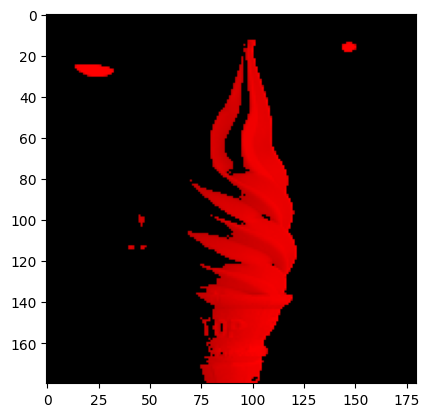

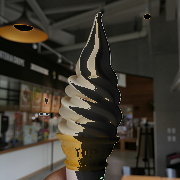

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

soft_org = Image.open("soft.png")

soft_r = np.zeros((soft_org.height, soft_org.width, 3), dtype=np.uint8)
soft_org_array = np.array(soft_org)
soft_r[:, :, 0] = soft_org_array[:, :, 0]

print(soft_r)

# 赤のみの画像データの元（soft_r）を変更しないよう、複製物の作成
soft_r_trimmed = np.copy(soft_r)

# 赤の色について、色の強さ 192 を基準とした二値化
soft_r_wb = soft_r_trimmed[:, :, 0] // 192

# 赤のみの画像データと二値化したデータのかけ算
soft_r_trimmed[:, :, 0] *= soft_r_wb

# 赤の強さ 192 以上のみのピクセルを残した画像データの表示
plt.imshow(soft_r_trimmed)
plt.show()


# 土台
soft_base = Image.new("RGB", (soft_org.width, soft_org.height))

# マスキング用のデータ
soft_r_trimmed_img = Image.fromarray(soft_r_trimmed[:, :, 0]).convert("L")

# マスク処理を実行して結果を表示
soft_masked = Image.composite(soft_base, soft_org, soft_r_trimmed_img)
soft_masked

